In [2]:
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
import contextily

In [8]:
municipiosSP = gpd.read_file('../Data/Pratica1/SIRGAS_limites_municipios_estado_sao_paulo/SIRGAS_limites_municipais.shp')

In [9]:
municipiosSP.head()

,limite_id,municipio,Geometry_s,geometry
0,1,ITANHAÉM,1J6s,"POLYGON ((307339.109 7316497.555, 306260.118 7..."
1,10,EMBU-GUAÇU,1J6tf,"POLYGON ((306250.297 7350903.625, 306194.975 7..."
2,100,ITUVERAVA,NaN,"POLYGON ((194518.637 7762304.185, 194541.437 7..."
3,101,JABORANDI,NaN,"POLYGON ((142127.776 7701403.306, 142041.293 7..."
4,102,JABOTICABAL,NaN,"POLYGON ((150695.076 7658574.445, 150773.090 7..."


<Axes: >

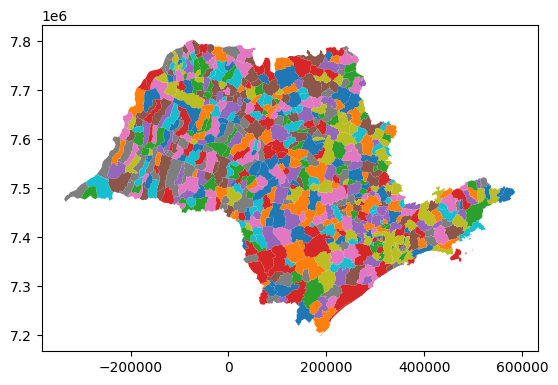

In [11]:
municipiosSP.plot(column='municipio')

In [12]:
municipiosSP.crs

In [ ]:
municipiosSP = municipiosSP.set_crs('SIRGAS2000')

In [28]:
SP = municipiosSP.query('municipio == "SÃO PAULO"')

<Axes: >

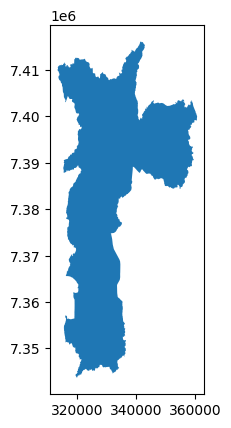

In [29]:
SP.plot()

In [30]:
SP.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [24]:
estacoes = gpd.read_file('../Data/Pratica1/SIRGAS_SHP_estacaometro/SIRGAS_SHP_estacaometro_point.shp')

In [17]:
estacoes.crs

In [21]:
estacoes = estacoes.to_crs('SIRGAS2000')

In [25]:
estacoes.head()

,emt_empres,emt_situac,emt_linha,emt_nome,geometry
0,METRO,OPERANDO,VERMELHA,CORINTHIANS-ITAQUERA,POINT (349839.380 7395675.047)
1,METRO,OPERANDO,VERMELHA,ARTUR ALVIM,POINT (348457.592 7395884.165)
2,METRO,OPERANDO,VERMELHA,PATRIARCA,POINT (346732.712 7396874.617)
3,METRO,OPERANDO,VERMELHA,GUILHERMINA-ESPERANÇA,POINT (345181.965 7397070.921)
4,METRO,OPERANDO,VERMELHA,VILA MATILDE,POINT (343708.935 7396765.736)


<Axes: >

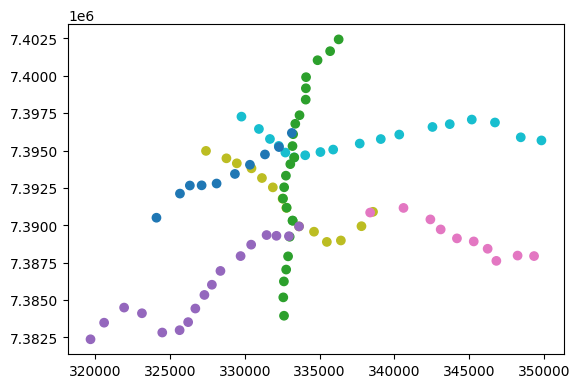

In [26]:
estacoes.plot(column='emt_linha')

In [31]:
dic_cor = {'VERMELHA' : 'red', 'AZUL' : 'blue', 'VERDE' : 'green', 'PRATA' : 'silver', 'AMARELA' : 'yellow', 'LILAS': 'purple'}

In [32]:
#replace color in estacoes
estacoes['cor'] = estacoes['emt_linha'].map(dic_cor)

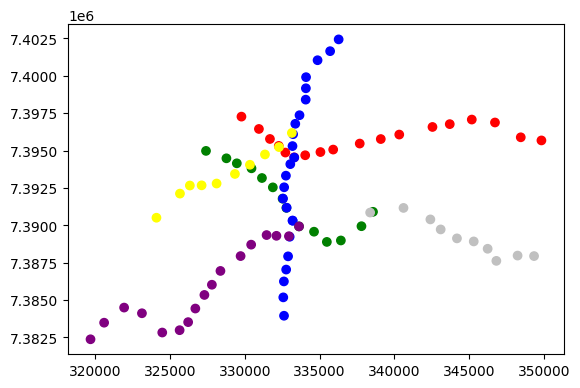

In [38]:
estacoes.plot(color = estacoes['cor']);

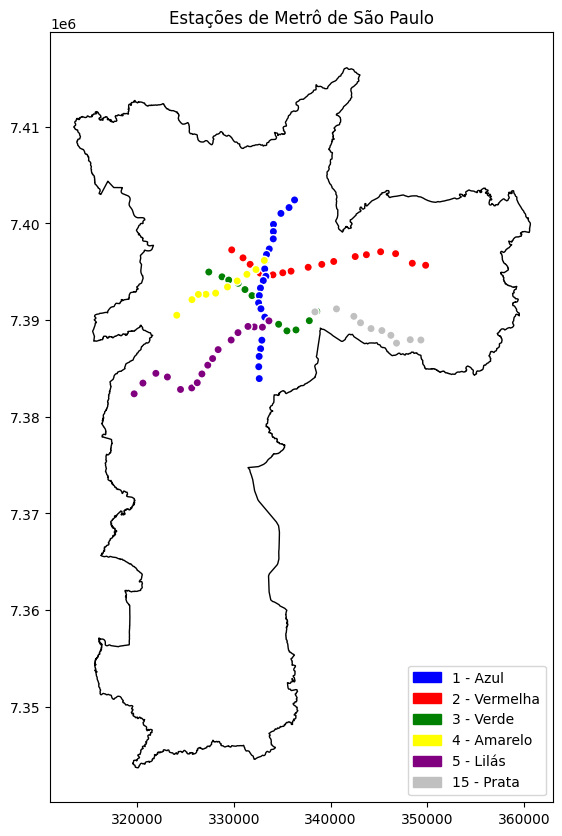

In [46]:
import matplotlib.patches as mpatches
azul = mpatches.Patch(color='blue', label='1 - Azul')
vermelho = mpatches.Patch(color='red', label='2 - Vermelha')
verde = mpatches.Patch(color='green', label='3 - Verde')
amarelo = mpatches.Patch(color='yellow', label='4 - Amarelo')
lilas = mpatches.Patch(color='purple', label='5 - Lilás')
prata = mpatches.Patch(color='silver', label='15 - Prata')

fig, grafico = plt.subplots(figsize=(10, 10))
SP.plot(ax=grafico, color='white', edgecolor='black')
estacoes.plot(ax=grafico, color=estacoes['cor'], edgecolor='white')
plt.title('Estações de Metrô de São Paulo')
plt.legend(handles=[azul, vermelho, verde, amarelo, lilas, prata], loc='lower right')
plt.show()

In [47]:
estacoes2 = estacoes.set_crs('EPSG:31983', allow_override=True)

In [48]:
SP2 = SP.set_crs('EPSG:31983', allow_override=True)

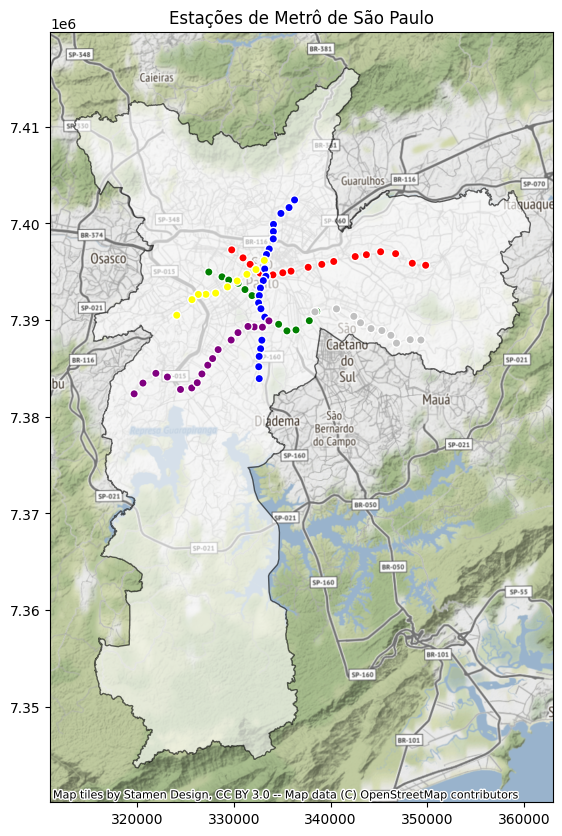

In [55]:
fig, grafico = plt.subplots(figsize=(10, 10))
SP2.plot(ax=grafico, color='white', edgecolor='black', alpha=0.6)
estacoes2.plot(ax=grafico, color=estacoes['cor'], edgecolor='white')
plt.title('Estações de Metrô de São Paulo')
contextily.add_basemap(grafico, crs=SP2.crs.to_string())
plt.show()